# Análisis sobre la tasa de suicidios mundial entre 1985 y 2016

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


Hemos realizado el siguiente análisis basandonos en los datos obtenidos en:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

Los datos incluidos en la base de datos, son:

- country, 
- year, 
- sex, 
- age group, 
- count of suicides, 
- population, 
- suicide rate, 
- country-year composite key, 
- HDI for year, 
- gdp_for_year, 
- gdp_per_capita, 
- generation (based on age grouping average)

### 1. Adquisición de Datos:

Importamos la Dataset, y las librerias que utilizaremos:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("suicide-rates-overview-1985-to-2016.csv")

### 2. Limpieza de Datos:

Es una base bastante limpia, pero aún asi procedemos a la limpieza de la Dataset: empezamos buscando los duplicados:

In [2]:
data_no_dupl = data.drop_duplicates()

Seguimos con los registros nulos; la columna "HDI for year" tiene mas de 19000 registros nulos: asi que la eliminamos:

In [3]:
null_cols=data_no_dupl.isnull().sum()
null_cols

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [4]:
data_no_dupl1=data_no_dupl.drop(['HDI for year'], axis=1)

Eliminamos la columna 'country-year' porque tenemos ya otras 2 columnas que nos facilitan esos datos:

In [5]:
data_clean=data_no_dupl1.drop(['country-year'], axis=1)

### 3. Análisis y visualización de Datos:

Viendo los datos, me parece relevante calcular el porcentaje de suicidios en función del sexo:

In [6]:
suicides_per_sex= data_clean.groupby(['sex'])['suicides_no'].sum()/(1559510+5188910)*100
suicides_per_sex

sex
female    23.109261
male      76.890739
Name: suicides_no, dtype: float64

Lo representamos en un grafico, donde claramente se ve la diferencia:

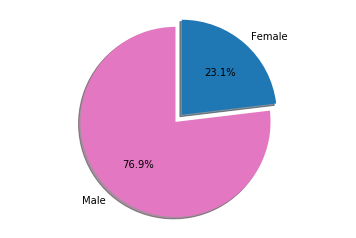

In [7]:
labels = 'Male', 'Female'
sizes = [76.90, 23.10]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors={'tab:blue', 'tab:pink'})
ax1.axis('equal')

plt.show()

Tambien parece relevante ver la evolucion en el tiempo del nº suicidios por año (nº suicidios total de todos los paises estudiados):

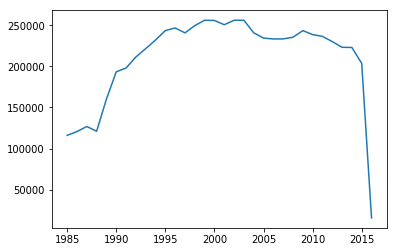

In [8]:
suicides_per_year= data_clean.groupby(['year'])['suicides_no'].sum()
suicides_per_year
plt.plot(suicides_per_year)

Los datos de 2016 son especialmente bajos, por lo que podemos pensar que no son del año completo; aun asi, podemos ver que, afortunadamente, la tendencia del nº de suicidios a nivel mundial es a la baja, desde 2003 aproximadamente.

Para completar nuestro análisis, nos parece básico conocer que paises tienen la tasa de suicidio mas alta del mundo:

In [9]:
#seleccionamos las columnas que nos interesan, y calculamos los totales por pais:
data_selected= data_clean[['country', 'suicides_no','population']]
data_selected_grouped= data_selected.groupby(['country']).sum()
#tanto el total de poblacion, como del numero de suicidios, suma los 31 años que ocupa el estudio; para poder interpretar los datos, calculamos la media, y sobre esos datos, calculamos la tasa de suicidio:
data_selected_grouped['population(mean)'] = data_selected_grouped['population']/31
data_selected_grouped['suicides_no(mean)'] = data_selected_grouped['suicides_no']/31
#incluyo una columna con la tasa media de suicidio de cada pais(/100k), de los años de 1985 a 2016:
data_selected_grouped['suicides_no/100k pop']= data_selected_grouped['suicides_no(mean)']/data_selected_grouped['population(mean)']*100000
#ordenamos los resultados en orden descendente:
suicides_per_country_ord=data_selected_grouped.sort_values(by=['suicides_no/100k pop'], ascending=False)
suicides_per_country_ord['suicides_no/100k pop'].head()

country
Lithuania             41.182219
Russian Federation    32.777207
Sri Lanka             30.483939
Belarus               30.344685
Hungary               29.717558
Name: suicides_no/100k pop, dtype: float64

Insertamos un gráfico con dichos paises y la tasa de suicidio media del periodo 1985 a 2016:

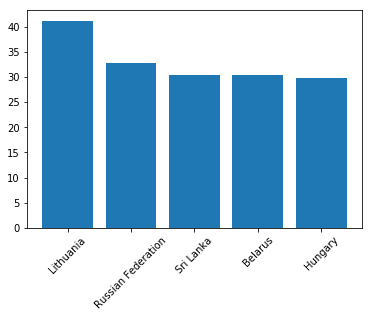

In [10]:
height = [41.18,32.77,30.48,30.34,29.71 ]
bars = ('Lithuania', 'Russian Federation','Sri Lanka','Belarus','Hungary')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars, rotation=45)
plt.show()

### 4. Reporte por e-mail:

Para finalizar, programamos que se genere un Informe y se envie por e.mail:

In [11]:
def report_to(email):
    text = 'El informe actualizado ha sido enviado'
    command = 'echo {} | mail -s "Nuevo informe" {}'.format(text, email)
    subprocess.Popen(command, shell=True)
    return "Enviado!"